In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else [])
df["job_skills"] = df["job_skills"].apply(lambda skills: [skill.title() for skill in skills] if len(skills) > 0 else skills)

c:\Users\danie\anaconda3\envs\data-analytics-advanced\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_us = df[df["job_country"] == "United States"].dropna(subset=["salary_year_avg"])

In [4]:
job_titles = df_us["job_title_short"].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [5]:
df_us_top6 = df_us[df_us["job_title_short"].isin(job_titles)]

In [6]:
job_titles = df_us_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index

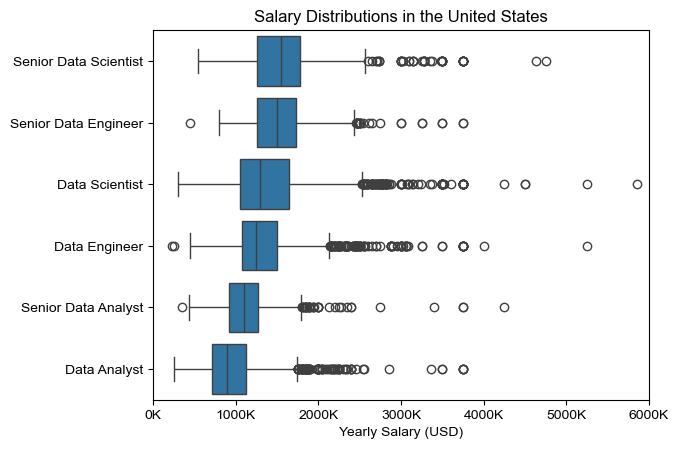

In [7]:
sns.boxplot(data=df_us_top6, x="salary_year_avg", y="job_title_short", order=job_titles)
sns.set_theme(style="ticks")

plt.title("Salary Distributions in the United States")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda x, pos: f"{int(x / 100)}K")
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [ ]:
df_da_us = df[
    (df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")
].copy()

df_da_us.dropna(subset=["salary_year_avg"], inplace=True)

In [14]:
df_da_us = df_da_us.explode("job_skills")

In [26]:
df_da_top_pay = (
    df_da_us.groupby("job_skills")["salary_year_avg"]
    .agg(["count", "median"])
    .sort_values("median", ascending=False)
)

df_da_top_pay = df_da_top_pay.head(10)

df_da_top_pay

,count,median
job_skills,,
Dplyr,2,196250.0
Bitbucket,3,189000.0
Gitlab,3,186000.0
Solidity,1,179000.0
Hugging Face,1,175000.0
Couchbase,1,160515.0
Ansible,1,159640.0
Mxnet,2,149000.0
Cassandra,6,148250.0


In [24]:
df_da_skills = (
    df_da_us.groupby("job_skills")["salary_year_avg"]
    .agg(["count", "median"])
    .sort_values("count", ascending=False)
)
df_da_skills = df_da_skills.head(10).sort_values("median", ascending=False)

df_da_skills

,count,median
job_skills,,
Python,1431,97500.00
Tableau,1364,92875.00
R,893,92500.00
Sql Server,286,92500.00
Sql,2508,91000.00
Sas,926,90000.00
Power Bi,838,90000.00
Powerpoint,462,85000.00
Excel,1808,84392.00


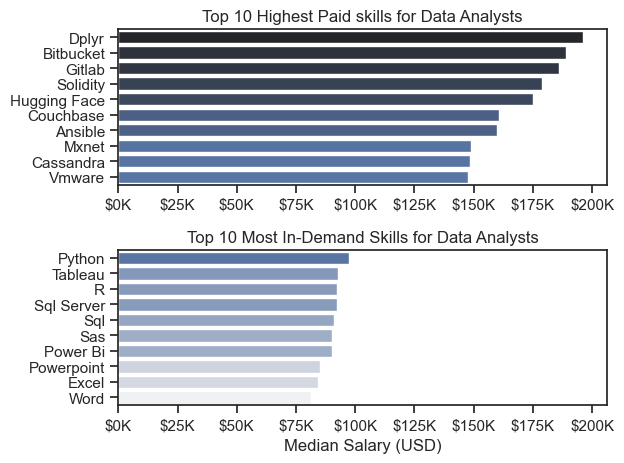

In [25]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

sns.barplot(data=df_da_top_pay, x="median", y=df_da_top_pay.index, hue="median", ax=ax[0], palette="dark:b_r")
ax[0].legend().remove()

ax[0].set_title("Top 10 Highest Paid skills for Data Analysts")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

sns.barplot(data=df_da_skills, x="median", y=df_da_skills.index, hue="median", ax=ax[1], palette="light:b")
ax[1].legend().remove()

ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

plt.tight_layout()
plt.show()